In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f
from scipy.stats import t

In [52]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\archive (1)\\Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [54]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [55]:
num_duplicates = df.duplicated().sum()
print(num_duplicates)

0


In [56]:
data = df.copy()

In [57]:
yes_no_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']
for col in yes_no_cols:
    data[col] = data[col].map({'yes': 1, 'no': 0})


In [58]:
data['furnishingstatus'] = data['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})


In [59]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [60]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


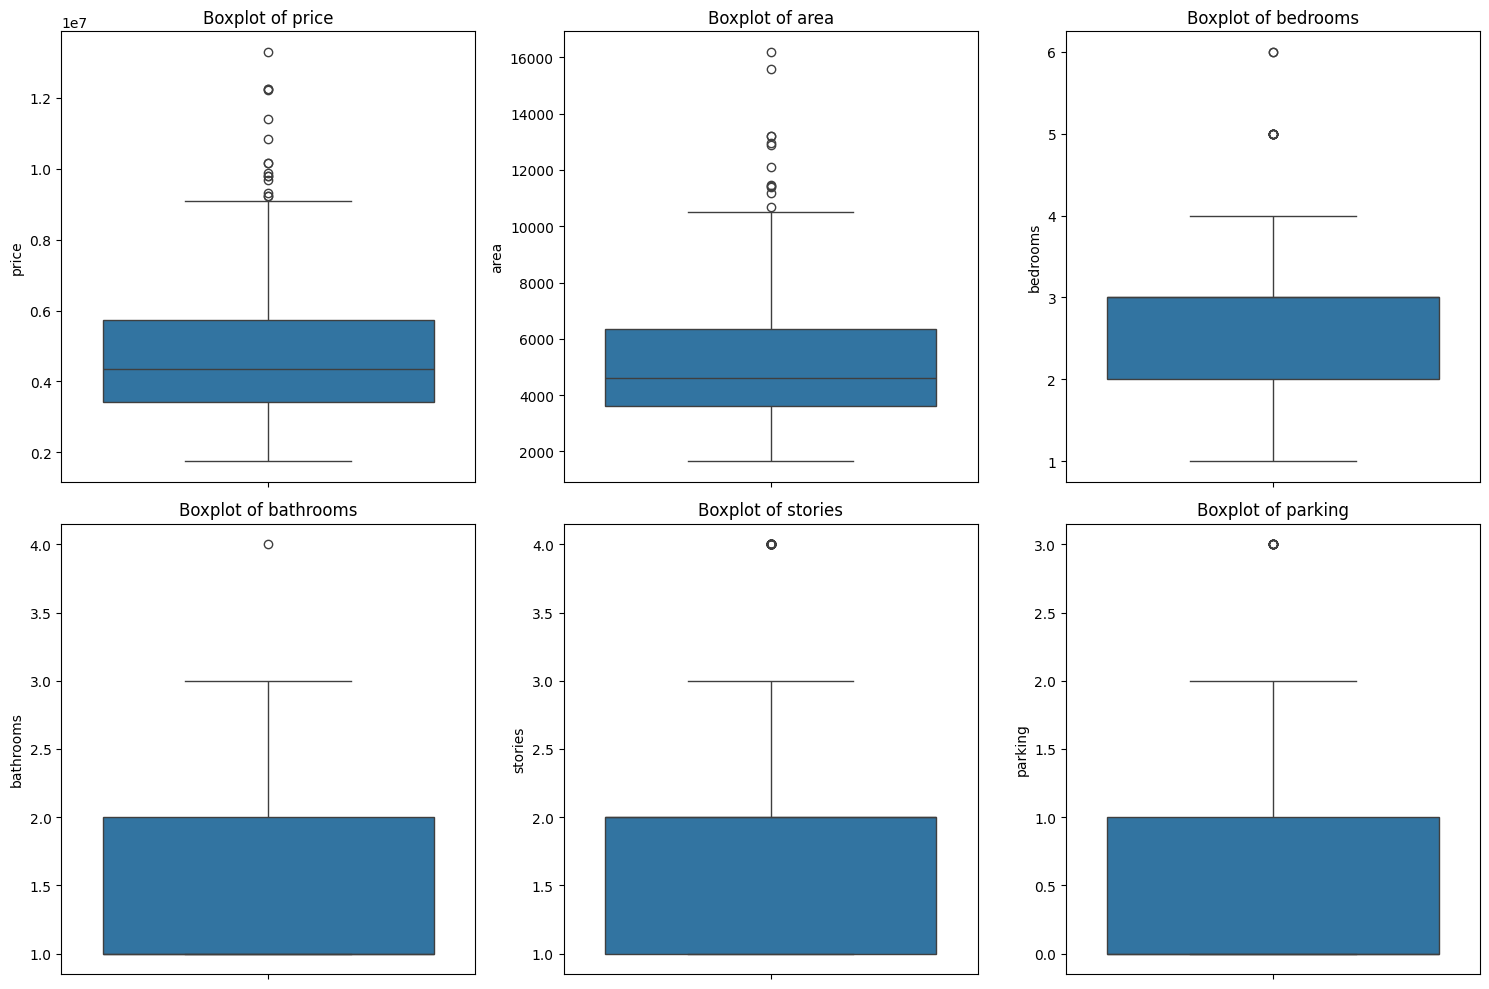

In [61]:
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [62]:
# دالة لحساب عدد الأوتلايرز حسب قاعدة IQR
def detect_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# نطبقها على price
price_outliers = detect_outliers('price')
print(f"Number of outlets in price: {len(price_outliers)}")

# نطبقها على area
area_outliers = detect_outliers('area')
print(f"Number of outlets inarea: {len(area_outliers)}")


bedrooms_outliers = detect_outliers('bedrooms')
print(f"Number of outlets inbedrooms: {len(bedrooms_outliers)}")


bathrooms_outliers = detect_outliers('bathrooms')
print(f"Number of outlets in bathrooms: {len(bathrooms_outliers)}")


stories_outliers = detect_outliers('stories')
print(f"Number of outlets in stories: {len(stories_outliers)}")


parking_outliers = detect_outliers('parking')
print(f"Number of outlets in parking: {len(parking_outliers)}")

Number of outlets in price: 15
Number of outlets inarea: 12
Number of outlets inbedrooms: 12
Number of outlets in bathrooms: 1
Number of outlets in stories: 41
Number of outlets in parking: 12


In [63]:
log_data = data.copy()

#  Apply log1p transformation (log(x + 1))
for col in numerical_cols:
    if (log_data[col] < 0).any():
        print(f"Warning: Negative values found in {col}, skipping log transformation.")
    else:
        log_data[col + '_log'] = np.log1p(log_data[col])

# Detect outliers in each log-transformed column using IQR
outliers_flags = pd.DataFrame(index=log_data.index)

for col in numerical_cols:
    log_col = col + '_log'
    if log_col in log_data.columns:
        Q1 = log_data[log_col].quantile(0.25)
        Q3 = log_data[log_col].quantile(0.75)
        IQR = Q3 - Q1
        is_outlier = (log_data[log_col] < Q1 - 1.5 * IQR) | (log_data[log_col] > Q3 + 1.5 * IQR)
        outliers_flags[col + '_outlier'] = is_outlier

# Combine to get all rows that are outliers in at least one column
outlier_rows = outliers_flags.any(axis=1)
outliers_combined = log_data.loc[outlier_rows]
print("\nOutliers based on log-transformed numerical columns:")
print(outliers_combined[numerical_cols].head(20))


Outliers based on log-transformed numerical columns:
        price   area  bedrooms  bathrooms  stories  parking
0    13300000   7420         4          2        3        2
7    10150000  16200         5          3        2        0
112   6083000   4300         6          2        2        0
125   5943000  15600         3          1        1        2
395   3500000   3600         6          1        2        1


In [64]:
log_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_log,area_log,bedrooms_log,bathrooms_log,stories_log,parking_log
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2,16.403275,8.912069,1.609438,1.098612,1.386294,1.098612
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2,16.321037,9.100637,1.609438,1.609438,1.609438,1.386294
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,16.321037,9.206433,1.386294,1.098612,1.098612,1.098612
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2,16.318175,8.922792,1.609438,1.098612,1.098612,1.386294
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2,16.250001,8.912069,1.609438,0.693147,1.098612,1.098612


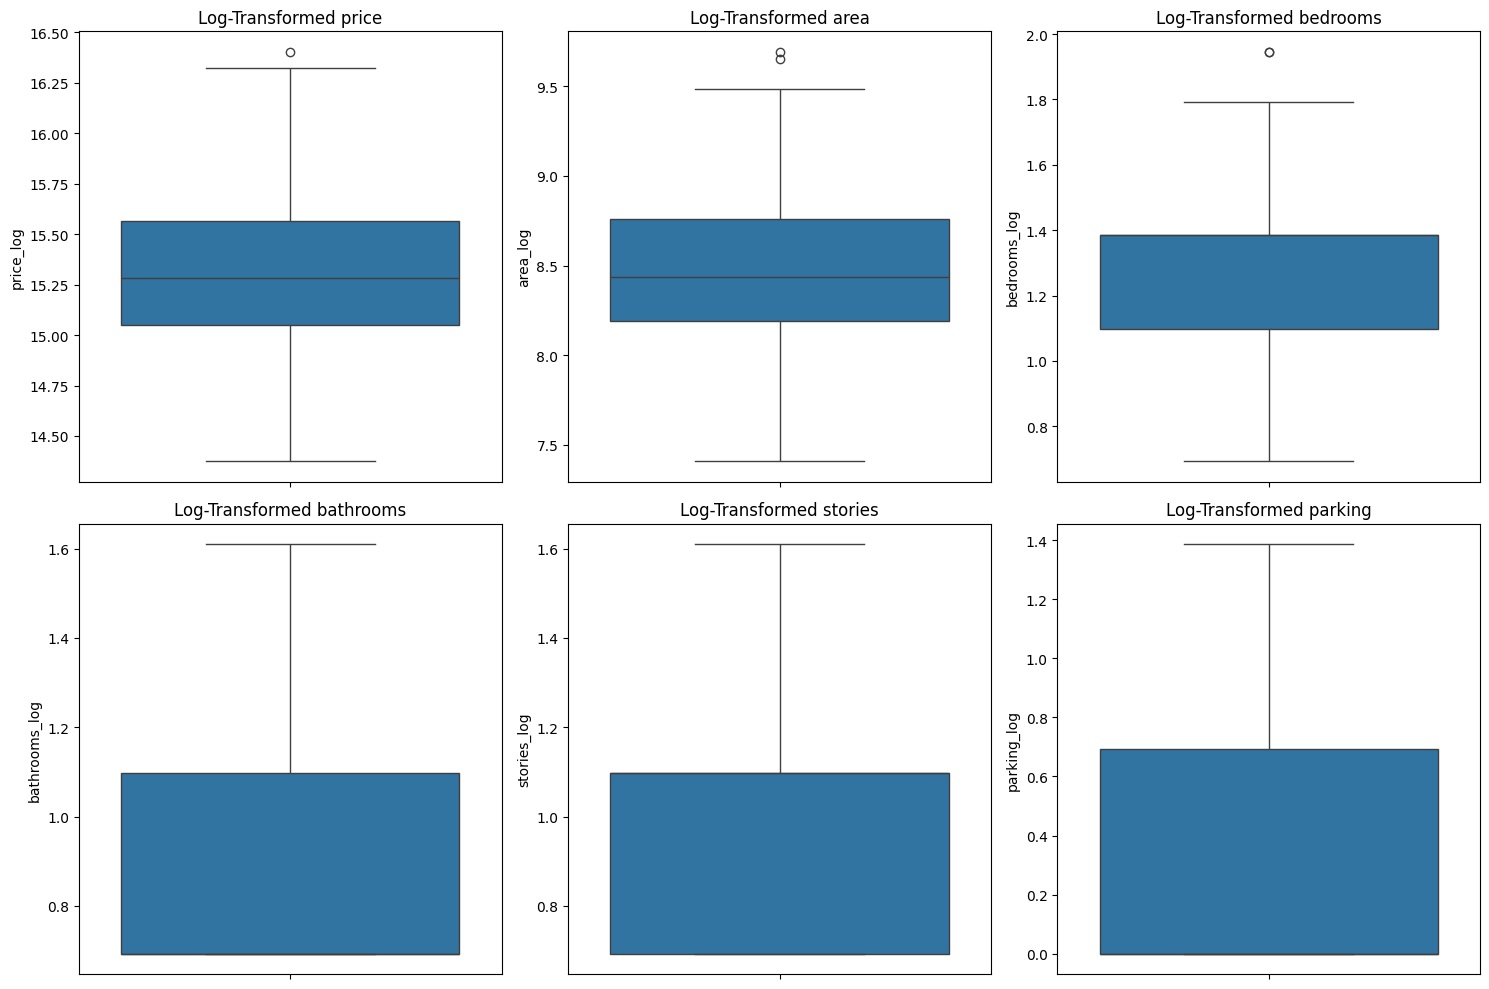

In [65]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=log_data[col + '_log'])
    plt.title(f'Log-Transformed {col}')
plt.tight_layout()
plt.show()

In [66]:
class MultipleLinearRegression:
    def __init__(self, X, y):
        # تحويل المدخلات إلى مصفوفات NumPy
        self.X = np.array(X)
        self.y = np.array(y).reshape(-1, 1)  # تحويل y إلى مصفوفة عمودية (n, 1)
        ones = np.ones((self.X.shape[0], 1))  # إنشاء عمود من القيم 1 لاستخدامه في المعامل الثابت
        self.X = np.hstack([ones, self.X])  # دمج العمود مع X
        self.coefficients = np.zeros((self.X.shape[1], 1))  # تهيئة المعاملات بصفر
        self.m = len(self.X)  # عدد الصفوف
        self.K = self.X.shape[1] - 1  # عدد المتغيرات
        self.p = self.K + 1  # عدد المعاملات
     
    def fit(self):
        XtX = self.X.T @ self.X  # حساب X.T * X
        self.XtX_inv = np.linalg.inv(XtX)  # حساب معكوس X.T * X
        self.Xty = self.X.T @ self.y  # حساب X.T * y
        self.coefficients = self.XtX_inv @ self.Xty  # حساب المعاملات باستخدام المعادلة

    def predict(self):
        # التنبؤ باستخدام نفس البيانات
        y_pred = self.X @ self.coefficients  # ضرب X مع المعاملات للحصول على التنبؤات
        return y_pred  # إرجاع التنبؤات
    
    def plot(self):
        y_pred = self.predict()  # استخدام الدالة predict للحصول على التنبؤات
        residuals = self.y - y_pred
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.scatter(self.y, y_pred, color='blue')
        plt.plot([self.y.min(), self.y.max()], [self.y.min(), self.y.max()], 'r--')
        plt.title("Actual vs Predicted")
        plt.xlabel("Actual")
        plt.ylabel("Predicted")

        plt.subplot(1, 2, 2)
        plt.scatter(y_pred, residuals, color='green')
        plt.axhline(0, color='red', linestyle='--')
        plt.title("Residuals vs Predicted")
        plt.xlabel("Predicted")
        plt.ylabel("Residuals")

        plt.tight_layout()
        plt.show()

    def anova_table (self):
          
        #Calculate the dot product of y and y (to be used for calculating SSE and SST)
        yty=np.dot(self.y.T, self.y)
        #Calculate the mean of    y
        y_bar = np.mean(self.y)
        # Compute the estimated coefficients (B_h)
       # B_h=np.dot(X_dot_XT_inv,X_transpose_y)
        B_h = self.coefficients
        #Transpose of the estimated coefficients B_h
        B_h_transpose = B_h.T
        #Compute the squared term of the mean of y (y_bar) multiplied by the number of observations (m)
        m_ybar_square=self.m*(y_bar**2)
  
        # Calculate the error sum of squares (SSE)
        self. SSE=yty-(np.dot(B_h_transpose,self.Xty ))
        #Calculate the total sum of squares (SST)
        self.SST=yty-m_ybar_square
        #Calculate the regression sum of squares (SSR)
        self.SSR=np.dot(B_h_transpose,self.Xty )-m_ybar_square


        
        # dof for regression
        self.df_reg=self.K
        #dof for error
        self.df_error=self.m-self.p
        # dof for total
        df_total = self.m - 1

        #Mean square regression
        MSR=self.SSR/self.df_reg
        #Mean square error
        self.MSE=self.SSE/self.df_error
        
        # F-statistic
        self.F_stat= MSR /self.MSE
        
        anova_data = {
           'Source': ['Regression', 'Error', 'Total'],
           'Sum of Squares': [self.SSR,self.SSE,self.SST],
           'Degrees of Freedom': [self.df_reg, self.df_error,df_total],
            'Mean Square': [MSR,self. MSE, ""],
            'F-Statistic': [self.F_stat, "", ""]
                  }
        anova_data = pd.DataFrame(anova_data)
        return anova_data
    

In [67]:
X = log_data[['area_log', 'bedrooms_log', 'bathrooms_log', 'stories_log', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking_log', 'prefarea', 'furnishingstatus']]
y = log_data['price_log']


In [68]:
model = MultipleLinearRegression(X, y)  # البيانات جاهزة
model.fit()                             # تدريب الموديل


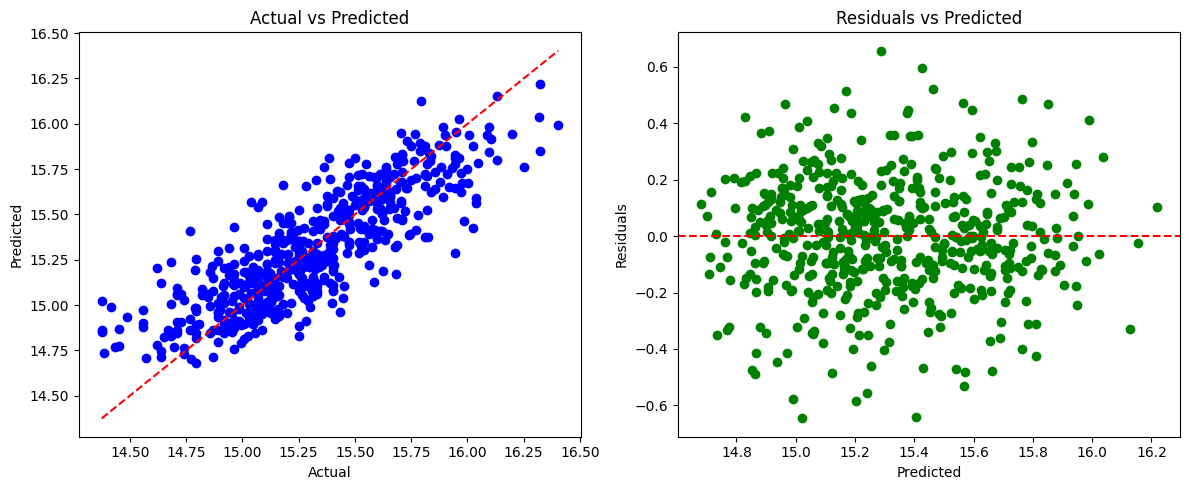

In [69]:
model.plot()                            # الرسم

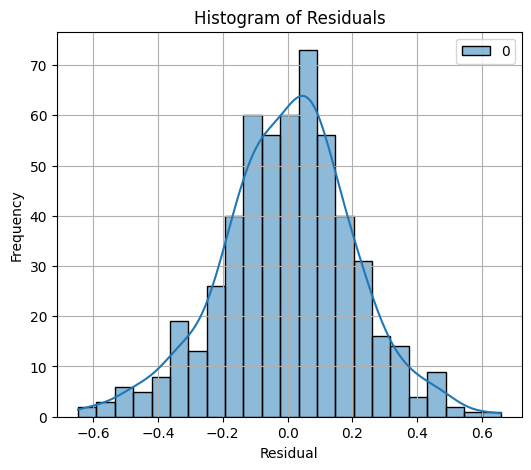

In [70]:
y_pred = model.X @ model.coefficients
residuals = model.y - y_pred

plt.figure(figsize=(6, 5))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [71]:
model.anova_table()

,Source,Sum of Squares,Degrees of Freedom,Mean Square,F-Statistic
0,Regression,[[52.75464771788393]],12,[[4.396220643156994]],[[103.517955470894]]
1,Error,[[22.593079350539483]],532,[[0.04246819426793136]],
2,Total,[[75.34772706842341]],544,,


In [ ]:
def hypothesis_test(self, alpha=0.05):
    if not hasattr(self, 'F_stat'):
        print("F-statistic not found.")
        return
# عشان نطلع القيمه كرقم من جدول الانوفا
    F_stat_value = self.F_stat.item()
# -----------------------------------------------------
    p_value = 1 - f.cdf(F_stat_value,self.df_reg , self.df_error)
# -------------------------------------------------------------
    print(f"F-statistic: {F_stat_value:.4f}")
    print(f"p-value: {p_value}") #calculations to avoid precision loss



    if p_value < alpha:
        print(f"Reject H₀: Found enough evidence to claim that the null hypothesis is unlikely to be true.)")
    else:
        print(f"Fail to reject H₀: Haven't found compelling evidence to prove the opposite.")

# Link the method to the class
MultipleLinearRegression.hypothesis_test = hypothesis_test

In [82]:
model.hypothesis_test()

F-statistic: 103.5180
p-value: 1.1102230246251565e-16
Reject H₀: Found enough evidence to claim that the null hypothesis is unlikely to be true.)


In [74]:
from scipy.stats import t

This will give access to functions related to the t-distribution (inverse cdf (ppf))
When computing confidence intervals for coefficients, we will need the t-critical value: 𝛽`±𝑡∗⋅𝑆𝐸

In [88]:
def confidence_intervals(self, alpha=0.05):
    # لو مفيش df_error
    if not hasattr(self, 'df_error'):
        print("Please run anova_table() first to compute necessary statistics.")
        return

     
    MSE =self.MSE.item()  # Extract scalar

    # Standard errors of coefficients
    # جبنا الفارينس من فارينس كوفارينس ماتريكس 
    var_b = MSE * np.diag(self.XtX_inv)

    SE_b = np.sqrt(var_b)

    # t critical value
    t_crit = t.ppf(1-alpha/2, self.df_error)

    # Coefficients as flat array
    coeffs = self.coefficients.flatten()

    # Confidence intervals
    ci_lower = coeffs - t_crit * SE_b
    ci_upper = coeffs + t_crit * SE_b

    # Create DataFrame for display
    ci_table = pd.DataFrame({
        'Coefficient': coeffs,
        'SE': SE_b,
        # --------------------------------------------------
        f'{100*(1-alpha)}% CI Lower': ci_lower,
        f'{100*(1-alpha)}% CI Upper': ci_upper
        # ----------------------------------------------

    })

    return ci_table

# Link the method to the class
MultipleLinearRegression.confidence_intervals = confidence_intervals

In [ ]:
ci = model.confidence_intervals(alpha=0.05)
# ---------------------------------------------------------
ci['Significant (95%)'] = ~((ci['95.0% CI Lower'] <= 0) & (ci['95.0% CI Upper'] >= 0)) 
# 0 = no relationship between predictor and outcome (coffecient = 0 )
ci

,Coefficient,SE,95.0% CI Lower,95.0% CI Upper,Significant (95%)
0,11.679282,0.216613,11.253761,12.104803,True
1,0.302971,0.026265,0.251376,0.354567,True
2,0.118616,0.057491,0.005679,0.231554,True
3,0.424276,0.051415,0.323275,0.525277,True
4,0.259199,0.038271,0.184017,0.334380,True
5,0.097365,0.027753,0.042847,0.151884,True
6,0.053271,0.025521,0.003137,0.103405,True
7,0.092681,0.021224,0.050988,0.134375,True
8,0.164375,0.043093,0.079721,0.249028,True
9,0.160209,0.020887,0.119178,0.201240,True


(e.g. Having coefficient = 0  : 𝑦 = 2.5+ 0⋅𝑥)
This means: Changing x₁ has no effect on y (Predictor x₁ is useless in predicting y)

So 
True → confidence interval does not contain 0 → statistically significant
False → CI contains 0 → not significant

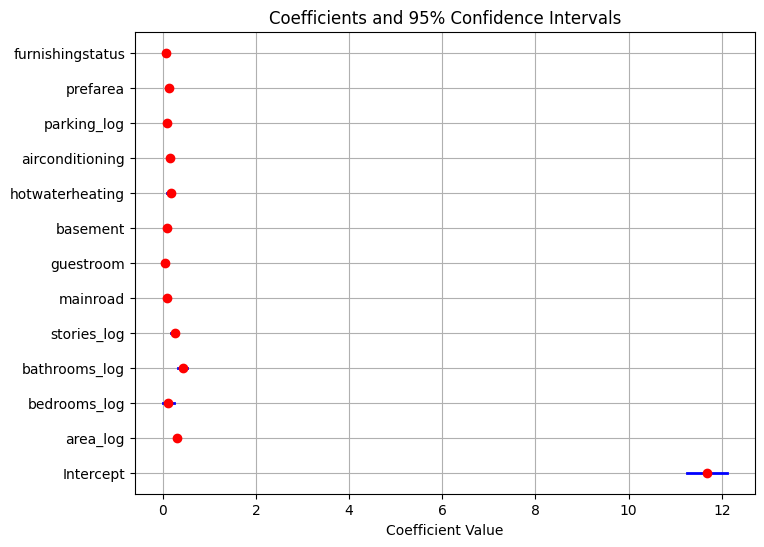

In [87]:
plt.figure(figsize=(8, 6))
feature_names = ['Intercept'] + list(X.columns)

# Plot CI lines and coefficients
for i, row in ci.iterrows():
    plt.plot([row[f'{100*(1-0.05)}% CI Lower'], row[f'{100*(1-0.05)}% CI Upper']], 
             [i, i], color='blue', lw=2)
    plt.scatter(row['Coefficient'], i, color='red', zorder=5)

plt.yticks(range(len(ci)), feature_names)

plt.xlabel('Coefficient Value')
plt.title('Coefficients and 95% Confidence Intervals')
plt.grid(True)
plt.show()
